# 🧠 Big Data Analysis on Diabetes Health Indicators (BRFSS 2015)

This notebook demonstrates how to use **Dask** for scalable big data processing on a health dataset containing ~250K records. We analyze diabetes-related patterns and showcase how Dask can efficiently process large datasets.

## Install Dask

In [ ]:
# pip install -q dask[complete]

## Import Libraries

In [7]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 📥 Load the Dataset

We load the BRFSS 2015 dataset using Dask to enable parallel computation.

In [10]:
df = dd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 🔎 Basic Info

We inspect column types and check for missing values.

In [13]:
# Check column types
df.dtypes

# Check for null values
df.isnull().sum().compute()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## 📊 Summary Statistics

We compute basic statistical summaries to understand the data distribution.

In [16]:
df.describe().compute()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Target Variable Distribution - ✅ Diabetes Prevalence

Let’s explore the class distribution of the target variable `Diabetes_binary`.

In [19]:
df['Diabetes_binary'].value_counts().compute()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

## ⚖️ BMI Category Analysis

We group BMI into standard health categories and evaluate the diabetes prevalence in each.

In [24]:
# Define a function to apply pd.cut within each partition
def bucketize_bmi(df_partition):
    return pd.cut(df_partition['BMI'], 
                  bins=[0, 18.5, 25, 30, 35, 40, 100],
                  labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Severe'])

# Apply the function using map_partitions
df['BMI_Category'] = df.map_partitions(
    lambda df_partition: bucketize_bmi(df_partition),
    meta=('BMI_Category', 'category')
)

# Show a few rows
df[['BMI', 'BMI_Category']].head()

,BMI,BMI_Category
0,40.0,Obese II
1,25.0,Normal
2,28.0,Overweight
3,27.0,Overweight
4,24.0,Normal


## 📈 Diabetes Rate by BMI Category

We compute the average diabetes rate for each BMI category.

In [27]:
bmi_diabetes_rate = df.groupby('BMI_Category')['Diabetes_binary'].mean().compute()
bmi_diabetes_rate

BMI_Category
Underweight    0.054045
Normal         0.062475
Overweight     0.126821
Obese I        0.211527
Obese II       0.285311
Severe         0.338270
Name: Diabetes_binary, dtype: float64

## 📊 Visualization

A simple bar chart to visualize diabetes rate by BMI category.

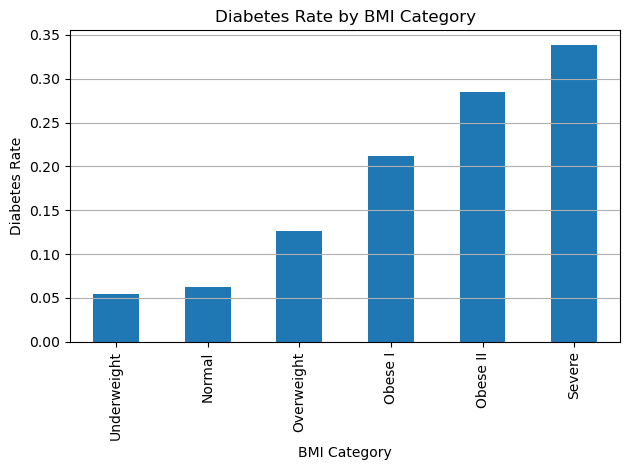

In [30]:
bmi_diabetes_rate.plot(kind='bar', title='Diabetes Rate by BMI Category', ylabel='Diabetes Rate', xlabel='BMI Category')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## ✅ Conclusion

In this notebook, we:
- Loaded a moderately large dataset (~250K rows) using **Dask**
- Performed initial exploration and cleaning
- Analyzed diabetes prevalence by BMI categories
- Visualized and saved the results

This demonstrates the scalability and performance of Dask in a notebook environment.

## ANALYSES

## 🎯 Objective

Explore the dataset to uncover patterns and relationships between health behaviors, demographics, and the likelihood of having diabetes.

## ✅ Insightful Questions & Analyses to Explore

Here’s a categorized list of high-impact exploratory questions you can answer using Dask:

### 🟡 1. Diabetes Prevalence (Target Variable)

Q1: What percentage of respondents have diabetes?

In [48]:
(df['Diabetes_binary'].mean().compute()) * 100  # in percentage

13.933301797540206

### 🔵 2. Demographic Breakdown

Q2: How does diabetes prevalence vary by **age category**?

You can bucket Age if it exists, or explore a similar field.

Q3: What is the diabetes rate among different **sex groups**?

In [50]:
df.groupby('Sex')['Diabetes_binary'].mean().compute()

Sex
0.0    0.129679
1.0    0.151603
Name: Diabetes_binary, dtype: float64

### 🟢 3. Lifestyle & Health Behaviors

Q5: How does BMI category affect diabetes prevalence?

✔️ Already done!

Q6: Is there a correlation between physical activity (PhysActivity) and diabetes?

In [52]:
df.groupby('PhysActivity')['Diabetes_binary'].mean().compute()

PhysActivity
0.0    0.211448
1.0    0.116127
Name: Diabetes_binary, dtype: float64

Q7: Is fruit consumption (Fruits) or vegetable intake (Veggies) associated with lower diabetes rates?

In [54]:
df.groupby('Fruits')['Diabetes_binary'].mean().compute()
df.groupby('Veggies')['Diabetes_binary'].mean().compute()

Veggies
0.0    0.179979
1.0    0.129887
Name: Diabetes_binary, dtype: float64

Q8: How does smoking status (Smoker) relate to diabetes?

In [56]:
df.groupby('Smoker')['Diabetes_binary'].mean().compute()

Smoker
0.0    0.120553
1.0    0.162929
Name: Diabetes_binary, dtype: float64

### 🔴 4. Chronic Conditions & Mental Health

Q9: What is the impact of high blood pressure (HighBP) or high cholesterol (HighChol) on diabetes likelihood?

In [58]:
df.groupby('HighBP')['Diabetes_binary'].mean().compute()
df.groupby('HighChol')['Diabetes_binary'].mean().compute()

HighChol
0.0    0.079814
1.0    0.220149
Name: Diabetes_binary, dtype: float64

Q10: Is there a link between mental health status (MentHlth) and diabetes?

In [60]:
def mental_health_category(x):
    if x == 0:
        return 'Good'
    elif x <= 14:
        return 'Moderate'
    else:
        return 'Poor'

df['MentHlth_Category'] = df.map_partitions(
    lambda df: df['MentHlth'].apply(mental_health_category),
    meta=('MentHlth_Category', 'object')
)
df.groupby('MentHlth_Category')['Diabetes_binary'].mean().compute()

MentHlth_Category
Good        0.133214
Moderate    0.127915
Poor        0.212024
Name: Diabetes_binary, dtype: float64

### 🟣 5. Combined Risk Profiling

Q11: What is the diabetes rate among individuals with both obesity and high blood pressure?

In [62]:
df[(df['BMI'] >= 30) & (df['HighBP'] == 1)]['Diabetes_binary'].mean().compute()

0.32828730171511394

### 📈 Visualizations

#### 📊 1. Bar Chart: Diabetes Rate by Physical Activity

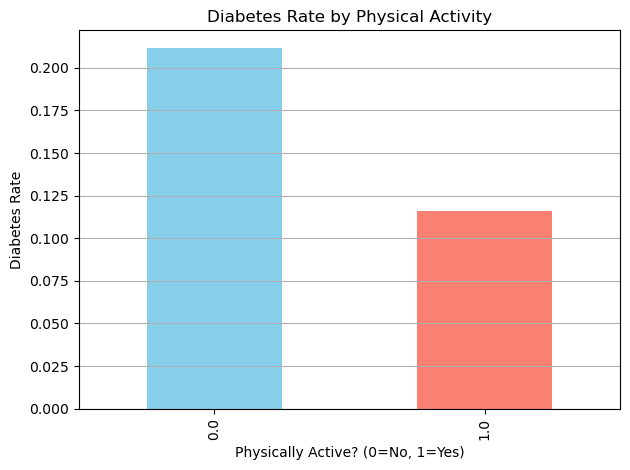

In [64]:
# Group and compute diabetes rate by PhysActivity
phys_activity_rate = df.groupby('PhysActivity')['Diabetes_binary'].mean().compute()

# Plot
phys_activity_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diabetes Rate by Physical Activity')
plt.xlabel('Physically Active? (0=No, 1=Yes)')
plt.ylabel('Diabetes Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 🔥 2. Correlation Heatmap

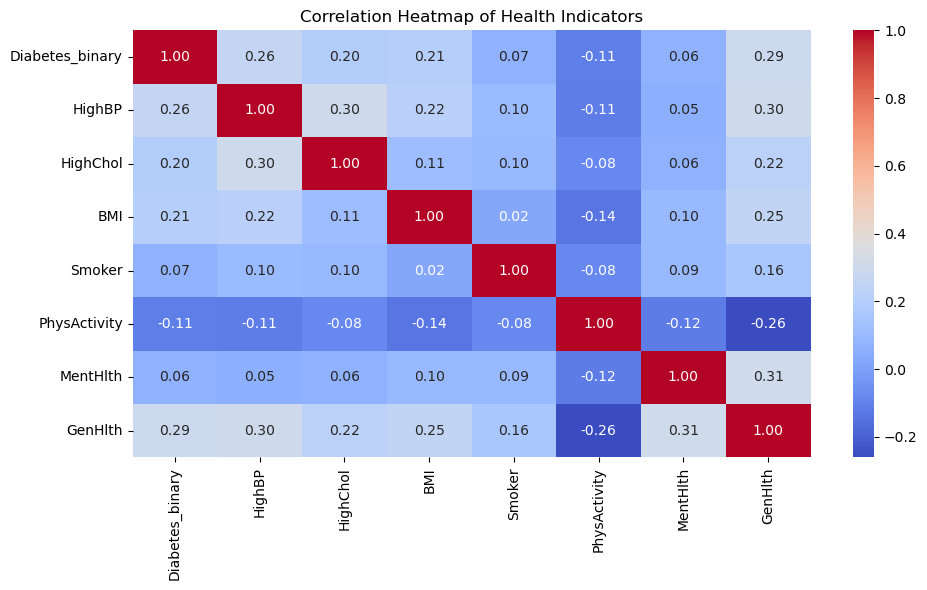

In [66]:
# Convert small sample to pandas
columns_of_interest = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'MentHlth', 'GenHlth']
df_small = df[columns_of_interest].sample(frac=0.1, random_state=1).compute()  # sample 10%

# Plot correlation heatmap
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_small.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Health Indicators')
plt.tight_layout()
plt.show()

#### ⚖️ 3. Scatter Plot: BMI vs. Mental Health, Colored by Diabetes

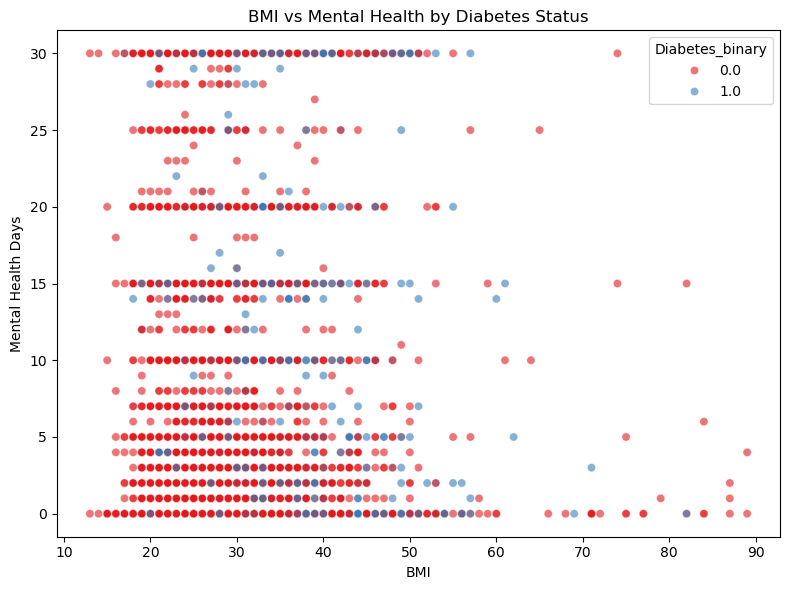

In [68]:
# Sample small data for visualization
df_plot = df[['BMI', 'MentHlth', 'Diabetes_binary']].sample(frac=0.05, random_state=42).compute()

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='BMI', y='MentHlth', hue='Diabetes_binary', palette='Set1', alpha=0.6)
plt.title('BMI vs Mental Health by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Mental Health Days')
plt.tight_layout()
plt.show()